In [1]:
%matplotlib inline

In [2]:
import pyathena as pa
from pyathena.set_plt import *

In [3]:
import glob

In [4]:
def norm_log_hist_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.bar(edges[:-1],hist,np.diff(edges),align='edge',**kwargs)
def norm_log_line_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.plot(edges[:-1]+0.5*np.diff(edges),hist,**kwargs)

In [5]:
def plot_sf_mass_func(sf):

    sp=pa.read_starvtk(sf)

    plt.ylim(0.5,100)
    plt.xlim(2,7)
    plt.yscale('log')

    if len(sp) >0:
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2)]
            cl_young=sp[(sp.mass > 0) & (sp.flag > -2) & (sp.mage*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.flag == -2)]
        else:
            cl=sp[(sp.mass > 0) & (sp.age < sp.time)]
            cl_young=sp[(sp.mass > 0) & (sp.age < sp.time) & (sp.age*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.age > sp.time)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=50)
        cl_young_hist,cl_young_edges=np.histogram(np.log10(cl_young.mass*units['Msun']),range=[2,7],bins=50)
        cl_ini_hist,cl_ini_edges=np.histogram(np.log10(cl_ini.mass*units['Msun']),range=[2,7],bins=50)

        norm_log_hist_plot(cl_ini_hist,cl_ini_edges,alpha=0.5,label='initial clusters',color='C0')
        norm_log_hist_plot(cl_hist,cl_edges,alpha=0.8,label='all new clusters',color='C1')
        norm_log_hist_plot(cl_young_hist,cl_young_edges,label='new young clusters',color='C2')

        plt.text(6.,10,'t={:6.2f}Myr'.format(sp.time[0]*units['Myr']))

In [6]:
def calc_normed_mass_funct(sf,trange=None,bins=50):

    sp=pa.read_starvtk(sf)

    if len(sp) >0:
        if trange == None:
            t1 = 0
            t2 = sp.time[0]
        else:
            t1,t2 = trange
        birth_time = sp.time-sp.age
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2) & (birth_time > t1) & (birth_time < t2)]
        else:
            cl=sp[(sp.mass > 0) & (birth_time > t1) & (birth_time < t2)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=bins)

        return cl_hist, cl_edges, sp.time[0]*units['Myr']


In [14]:
from startups.startup import *

### setting up for princeton-macbook system
### base directory path is /Users/ckim/Research/TIGRESS/

Welcome to IPython!



In [9]:
base='/Users/ckim/Research/TIGRESS/'

In [10]:
dirs=glob.glob('{}/R*/starpar'.format(base))
#+glob.glob('{}/R*rst/starpar'.format(base))+glob.glob('{}/R*B1/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print(ids)
#pid='R2_4pc_noacc_largebox'
#ids=['R2_4pc_noacc_largebox']

['R8_Beta10_F20_two', 'R8_8pc_rst', 'R8_8pc_metal_hydro', 'R4_2pc_L512_B10', 'R8_Beta10_F00_two', 'R8_4pc_newacc', 'R8_16pc', 'R8_2pc_rst']


No handles with labels found to put in legend.


R8_4pc_newacc 675 675
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0000.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0001.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0002.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0003.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0004.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0005.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0006.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0007.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0008.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0009.starpar.vtk


No handles with labels found to put in legend.


/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0010.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0011.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0012.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0013.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0014.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0015.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0016.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0017.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0018.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0019.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0020.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0021.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0110.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0111.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0112.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0113.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0114.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0115.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0116.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0117.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0118.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0119.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0120.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0121.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0210.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0211.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0212.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0213.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0214.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0215.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0216.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0217.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0218.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0219.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0220.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0221.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0310.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0311.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0312.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0313.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0314.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0315.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0316.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0317.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0318.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0319.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0320.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0321.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0410.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0411.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0412.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0413.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0414.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0415.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0416.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0417.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0418.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0419.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0420.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0421.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0510.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0511.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0512.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0513.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0514.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0515.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0516.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0517.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0518.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0519.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0520.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0521.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0610.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0611.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0612.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0613.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0614.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0615.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0616.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0617.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0618.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0619.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0620.starpar.vtk
/Users/ckim/Research/TIGRESS/R8_4pc_newacc/starpar/R8_4pc_newacc.0621.starpar.vtk
/Users/ckim/Rese

/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0034.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0035.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0036.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0037.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0038.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0039.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0040.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0041.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0042.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0043.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0044.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R

/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0130.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0131.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0132.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0133.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0134.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0135.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0136.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0137.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0138.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0139.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0140.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R

/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0226.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0227.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0228.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0229.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0230.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0231.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0232.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0233.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0234.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0235.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0236.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R

/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0322.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0323.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0324.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0325.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0326.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0327.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0328.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0329.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0330.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0331.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R4_2pc_L512_B10.0332.starpar.vtk
/Users/ckim/Research/TIGRESS/R4_2pc_L512_B10/starpar/R

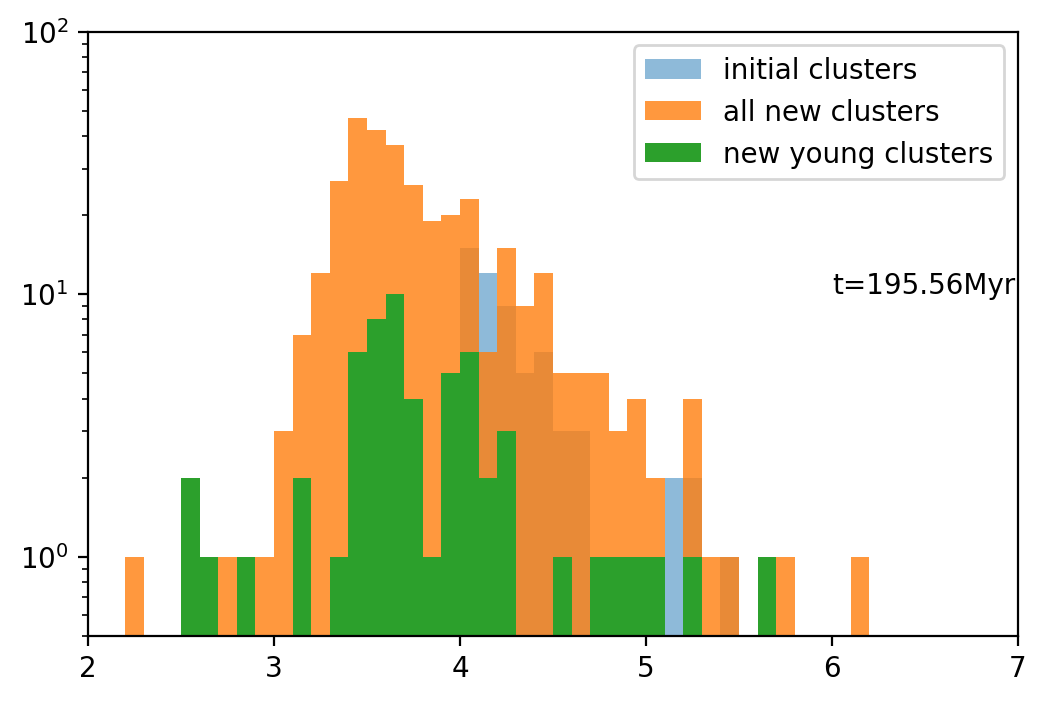

In [23]:
for pid in ['R8_4pc_newacc','R4_2pc_L512_B10']:
    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    png_files=glob.glob('{}{}/starpar/{}.*.starpar.massfunc.png'.format(base,pid,pid))
    nf1=len(starfiles)
    nf2=len(png_files)
    starfiles.sort()
    print(pid, nf1, nf2)
    nf2=0
    if nf1 > nf2:
        for sf in starfiles[nf2:]:
            plt.clf()
            print(sf)
            plot_sf_mass_func(sf)
            plt.legend()
            plt.savefig('{}massfunc.png'.format(sf.replace('vtk','')))
        

In [18]:
plt.rcParams['figure.dpi']=200

['R8_Beta10_F20_two', 'R8_8pc_rst', 'R8_8pc_metal_hydro', 'R8_Beta10_F00_two', 'R8_4pc_newacc', 'R8_16pc', 'R8_2pc_rst']


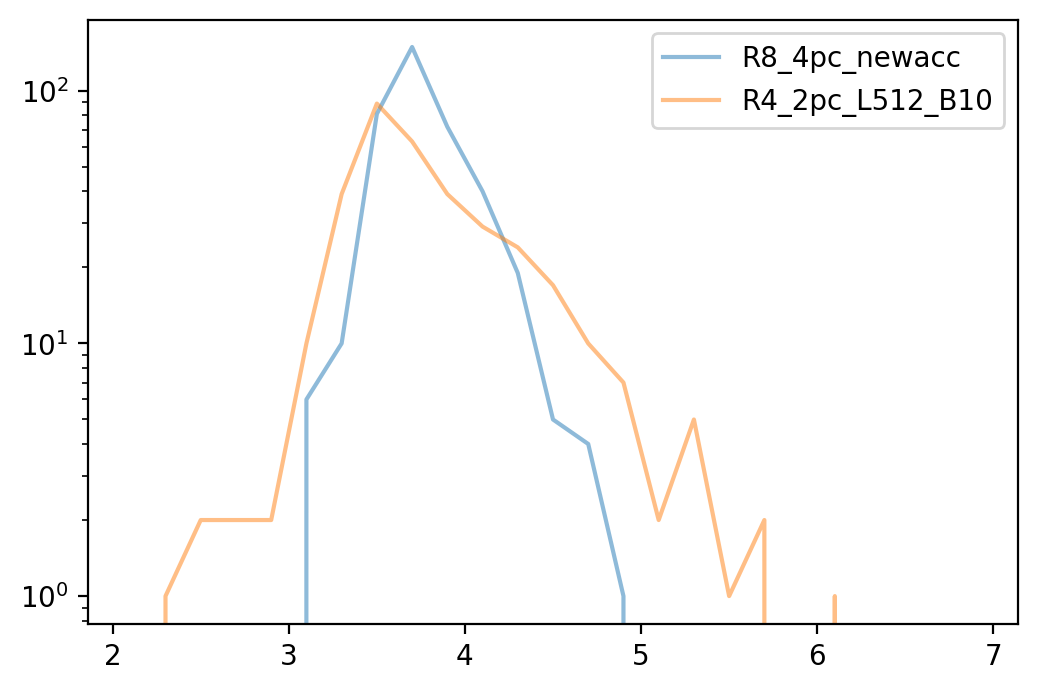

In [20]:
#dirs=glob.glob('{}/R*metal/starpar'.format(base))
dirs=glob.glob('{}/R8*/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print(ids)
for pid in ['R8_4pc_newacc','R4_2pc_L512_B10']:

    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    starfiles.sort()
    if len(starfiles) > 0:
        sf=starfiles[-1]
        cl_hist,cl_edges,time=calc_normed_mass_funct(sf,bins=25)
        if pid.endswith('largebox'): cl_hist = cl_hist/4.
        norm_log_line_plot(cl_hist,cl_edges,label=pid,alpha=0.5)
        plt.legend()
        plt.yscale('log')